In [3]:
import numpy as np

def bias_func(prob,step_num,sample_size):
    count=np.array(np.arange(step_num))
    x = np.random.binomial(n=20, p=prob, size=sample_size)
    x = x/20
    for o in range(step_num):
        count[o]=sum(x>=round(prob+0.05*o,2)) #this is the count of average that greater than alpha
    return count

prob=0.1 #this can change to 0.5 to get the plot of 0.5 (or can change to any other frequency value)
sample_size=1000000
step_num=int(round((1-prob)/0.05,1)+1) #this is to count how many 0.05 steps it needs from bias probability to reach 1.0
count=bias_func(prob,step_num,sample_size)
for i in range(step_num):print(count[i])

609271
323706
133463
43336
11232
2377
408
53
6
0
0
0
0
0
0
0
0
0
0


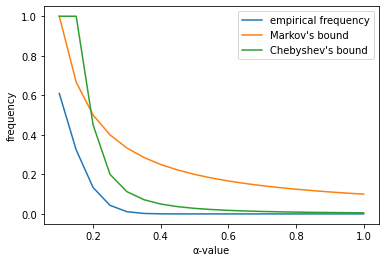

In [4]:
import matplotlib.pyplot as plt
E=prob #the expectation is equal to the probability in each one Bernoulli experiment.
V=prob*(1-prob)/20 #V is Var[X], this from the binomial distribution
x=[]
y1=[]
y2=[]
y3=[]
for i in range(step_num):
    x.append(prob+0.05*i)
    y1.append(count[i]/sample_size) #this is the empirical frequency
    y2.append(E/(prob+0.05*i)) #this is the Markov's bound
    k=prob+0.05*i-E #this is from Chebyshev's inequality, we need to solve k, so similar to Markov's inequality, move the E(X) to the right hand side of the equation, we got k=alpha-E(X)
    if(k==0):
        y3.append(1.0)
    elif(pow((1/k),2)*V>=1):
        y3.append(1.0)
    else:
        y3.append(pow((1/k),2)*V) #this is the Chebyshev's bound
#print('empirical frequency:',y1,'\nMarkov\'s bound:',y2,'\nChebyshev\'s bound:',y3)
fig, ax = plt.subplots()
ax.plot(x,y1,'-',label='empirical frequency')
ax.plot(x,y2,'-',label='Markov\'s bound')
ax.plot(x,y3,'-',label='Chebyshev\'s bound')
ax.set_xlabel('α-value')
ax.set_ylabel('frequency')
ax.legend()

In [5]:
fig.savefig('Assignment1Question2Plot3.pdf')